<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Est_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#bootstrap
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_correlation(X,Y,T,B=10000):
    plt.plot(X,Y,'.')
    plt.xlabel('X')
    plt.xlabel('Y',rotation=0)
    plt.title("X vs, Y.")
    estimations=[T(X,Y)]
    for i in range(B):
        X_s=np.random.choice(X,len(X))
        Y_s=np.random.choice(Y,len(Y))
        estimations.append(T(X_s,Y_s))
    se=np.std(estimations)
    print("Estimation T.hat: ", estimations[0],"\n")
    #Intervalos.
    print("Normal interval: ","(",estimations[0]-2*se,estimations[0]+2*se,")")
    print("Percentile interval: ","(",np.quantile(estimations,0.025),np.quantile(estimations,0.975),")")#Percentile, quantile
    print("Pivotal interval: ","(",2*estimations[0]-np.quantile(estimations,0.975),2*estimations[0]-np.quantile(estimations,0.025),")")

In [32]:
LSAT=[576,635,558,578,666,580,555,661,651,605,653,575,545,572,594]
GPA=[3.39,3.3,2.81,3.03,3.44,3.07,3.0,3.43,3.36,3.13,3.12,2.74,2.76,2.88,3.96]

In [33]:
def corr(X,Y):#Same len
    up=np.sum((X-np.mean(X))*(Y-np.mean(Y)))
    down=np.sum((Y-np.mean(Y))**2)*np.sum((X-np.mean(X))**2)
    return(up/np.sqrt(down))

Estimation T.hat:  0.5459189161795885 

Normal interval:  ( 0.008836813122761633 1.0830010192364155 )
Percentile interval:  ( -0.4976555000686635 0.5331298494126026 )
Pivotal interval:  ( 0.5587079829465745 1.5894933324278406 )


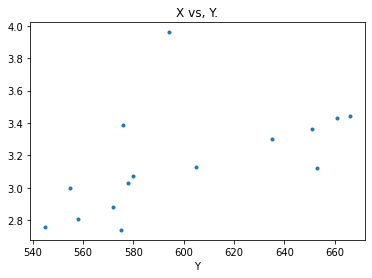

In [40]:
bootstrap_correlation(X=LSAT,Y=GPA,T=corr)